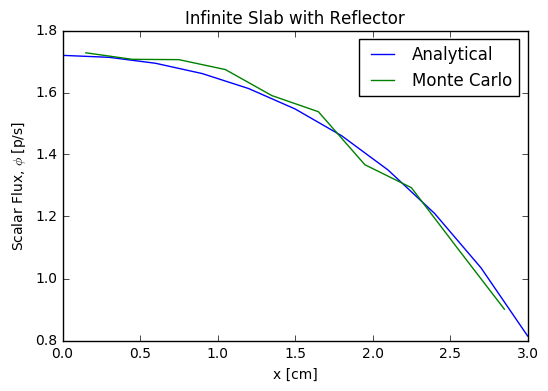

Analytical Scalar Flux Solution
Cell	 x [cm] 	 Scalar Flux
1 	 0.15 		 1.71823274713
2 	 0.45 		 1.70550560114
3 	 0.75 		 1.67947643668
4 	 1.05 		 1.63896954231
5 	 1.35 		 1.58215526201
6 	 1.65 		 1.50646735134
7 	 1.95 		 1.40848706281
8 	 2.25 		 1.28378872447
9 	 2.55 		 1.12673983663
10 	 2.85 		 0.930246657565

Monte Carlo Scalar Flux Solution
Cell	 x [cm] 	 Scalar Flux	 Deviation
1 	 0.15 		 1.728 		 0.0233238075794
2 	 0.45 		 1.707 		 0.0325252039023
3 	 0.75 		 1.706 		 0.03795318754
4 	 1.05 		 1.674 		 0.0243219151293
5 	 1.35 		 1.59 		 0.0427914840957
6 	 1.65 		 1.538 		 0.03265305839
7 	 1.95 		 1.367 		 0.045535090254
8 	 2.25 		 1.293 		 0.0488546597345
9 	 2.55 		 1.096 		 0.0473333333333
10 	 2.85 		 0.901 		 0.036314980074

Leakage at the Right Boundary
J = 0.7878 particles/second
Deviation = 0.0103363436475


In [1]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.integrate as integrate
%matplotlib inline

def inf_slab_reflector(Sig_t,Sig_s,Sig_a,Q,xB,Nc,Nb,N):
    """Uses Monte Carlo methods to calculate scalar flux and leakage of a homogenous
    infinite slab with a constant source and a reflector on the left slab boundary
    Inputs:
    Sig_t:  total macroscopic x-section [1/cm]
    Sig_s:  scattering macroscopic x-section [1/cm]
    Sig_a:  absorption macroscopic x-section [1/cm]
    Q:      strength of the source [p/cm/s]
    xB:     width of the slab [cm]
    Nc:     number of uniform grid cells
    Nb:     number of batches to perform
    N:      number of particles to simulate per batch
    
    Returns:
    X:         value of the cell centers in the mesh [cm]
    phi_avg:   scalar flux in each of the Nc cells [p/s]
    leak_avg:  particle leakage at the right boundary [p/s]
    phi_dev:   scalar flux standard deviations of each batch average
    leak_dev:  leakage standard deviation of each batch average
    """
    #create grid
    x_mid = np.arange(Nc)*xB/Nc+0.5*xB/Nc
    dx = xB/Nc
    X = np.linspace(dx*0.5,xB-0.5*dx,Nc)
    
    # define temporary batch storage for each cell
    phi1 = []
    phi2 = []
    phi3 = []
    phi4 = []
    phi5 = []
    phi6 = []
    phi7 = []
    phi8 = []
    phi9 = []
    phi10 = []
    phi_val = []
    leak_val = []
    # start history
    for j in range(Nb):
        leak = 0.0
        phi = np.zeros(Nc)
        for i in range(N):
            # sample particle initial position
            x = np.random.random(1)*xB
            # sample particle direction
            if(np.random.random(1)<=0.5):
                # particle moves left
                mu = -1.0
            else:
                # particle moves right
                mu = 1.0
            # particle distance to collision
            weight = Q*xB/N
            alive = 1
            # particle moves around in the system until it either
            # leaks or is absorbed
            while(alive):
                # sample distance particle has moved
                s = -(1/Sig_t)*np.log(1-np.random.random(1))  
                # update particle position
                x += s*mu
                if(x>xB):
                    # leaks out right boundary
                    leak += weight
                    alive = 0
                elif(x<=1.0e-14):
                    # hit left boundary, reflect back
                    mu = 1.0
                else:
                    # compute cell particle collision is in
                    cell = np.argmin(np.abs(X-x))
                    phi[cell] += weight/Sig_t/dx
                    # sample scattering
                    if(np.random.random(1) <= Sig_a/Sig_t):
                        # scatter, new mu
                        if(np.random.random(1)<=0.5):
                            mu = -1.0
                        else:
                            mu = 1.0
                    else:
                        # particle is absorbed
                        alive = 0
        # tally values from each batch
        phi1.append(phi[0])
        phi2.append(phi[1])
        phi3.append(phi[2])
        phi4.append(phi[3])
        phi5.append(phi[4])
        phi6.append(phi[5])
        phi7.append(phi[6])
        phi8.append(phi[7])
        phi9.append(phi[8])
        phi10.append(phi[9])
        leak_val.append(leak)
        phi_val.append(phi)
    
    # average flux from all batches
    phi_avg = np.zeros(Nc)
    phi_avg[0] = np.average(phi1)
    phi_avg[1] = np.average(phi2)
    phi_avg[2] = np.average(phi3)
    phi_avg[3] = np.average(phi4)
    phi_avg[4] = np.average(phi5)
    phi_avg[5] = np.average(phi6)
    phi_avg[6] = np.average(phi7)
    phi_avg[7] = np.average(phi8)
    phi_avg[8] = np.average(phi9)
    phi_avg[9] = np.average(phi10)

    # average leakage and deviation
    leak_avg = np.average(leak_val)
    leak_g2 = 0
    for n in range(Nb):
        leak_g2 += leak_val[n]**2
    leak_g2 = leak_g2/Nb
    leak_dev = np.sqrt((leak_g2-leak_avg**2)/(Nb-1))

    # flux deviations
    phi_dev = []
    phi1_g2 = 0
    for n in range(Nb):
        phi1_g2 += phi1[n]**2
    phi1_g2 = phi1_g2/Nb
    phi1_dev = np.sqrt((phi1_g2-phi_avg[0]**2)/(Nb-1))
    phi_dev.append(phi1_dev)

    phi2_g2 = 0
    for n in range(Nb):
        phi2_g2 += phi2[n]**2
    phi2_g2 = phi2_g2/Nb
    phi2_dev = np.sqrt((phi2_g2-phi_avg[1]**2)/(Nb-1))
    phi_dev.append(phi2_dev)

    phi3_g2 = 0
    for n in range(Nb):
        phi3_g2 += phi3[n]**2
    phi3_g2 = phi3_g2/Nb
    phi3_dev = np.sqrt((phi3_g2-phi_avg[2]**2)/(Nb-1))
    phi_dev.append(phi3_dev)

    phi4_g2 = 0
    for n in range(Nb):
        phi4_g2 += phi4[n]**2
    phi4_g2 = phi4_g2/Nb
    phi4_dev = np.sqrt((phi4_g2-phi_avg[3]**2)/(Nb-1))
    phi_dev.append(phi4_dev)

    phi5_g2 = 0
    for n in range(Nb):
        phi5_g2 += phi5[n]**2
    phi5_g2 = phi5_g2/Nb
    phi5_dev = np.sqrt((phi5_g2-phi_avg[4]**2)/(Nb-1))
    phi_dev.append(phi5_dev)

    phi6_g2 = 0
    for n in range(Nb):
        phi6_g2 += phi6[n]**2
    phi6_g2 = phi6_g2/Nb
    phi6_dev = np.sqrt((phi6_g2-phi_avg[5]**2)/(Nb-1))
    phi_dev.append(phi6_dev)

    phi7_g2 = 0
    for n in range(Nb):
        phi7_g2 += phi7[n]**2
    phi7_g2 = phi7_g2/Nb
    phi7_dev = np.sqrt((phi7_g2-phi_avg[6]**2)/(Nb-1))
    phi_dev.append(phi7_dev)

    phi8_g2 = 0
    for n in range(Nb):
        phi8_g2 += phi8[n]**2
    phi8_g2 = phi8_g2/Nb
    phi8_dev = np.sqrt((phi8_g2-phi_avg[7]**2)/(Nb-1))
    phi_dev.append(phi8_dev)

    phi9_g2 = 0
    for n in range(Nb):
        phi9_g2 += phi9[n]**2
    phi9_g2 = phi9_g2/Nb
    phi9_dev = np.sqrt((phi9_g2-phi_avg[8]**2)/(Nb-1))
    phi_dev.append(phi9_dev)

    phi10_g2 = 0
    for n in range(Nb):
        phi10_g2 += phi10[n]**2
    phi10_g2 = phi10_g2/Nb
    phi10_dev = np.sqrt((phi10_g2-phi_avg[9]**2)/(Nb-1))
    phi_dev.append(phi10_dev)

    return X,phi_avg,leak_avg,phi_dev,leak_dev

# define physical properties
Sig_t = 1.0
Sig_s = 0.5
Sig_a = Sig_t-Sig_s
Q = 1
xB = 3
# define number of cells, batches, and particles
Nc = 10
Nb = 10
N = 1000

# calculate flux, leakage, and deviations using monte carlo function
X,phi_avg,leak_avg,phi_dev,leak_dev = inf_slab_reflector(Sig_t,Sig_s,Sig_a,Q,xB,Nc,Nb,N)

# analytical solution
alpha = np.sqrt(Sig_a*Sig_t)
a = -(Sig_t*Q)/(Sig_a*(Sig_t*np.cosh(alpha*xB)+alpha*np.sinh(alpha*xB)))
phi_anal = lambda x: a*np.cosh(alpha*x)+Q/Sig_a
xs = np.linspace(0,xB,Nc+1)

# plot scalar flux
plt.plot(xs,phi_anal(xs),label='Analytical')
plt.plot(X,phi_avg,label='Monte Carlo')
plt.title('Infinite Slab with Reflector')
plt.xlabel('x [cm]')
plt.ylabel('Scalar Flux, $\phi$ [p/s]')
plt.legend(loc=1)
plt.show()

# print results
print('Analytical Scalar Flux Solution')
print('Cell\t x [cm] \t Scalar Flux')
for i in range(10):
    print(i+1,'\t',X[i],'\t\t',phi_anal(X[i]))
print('')
print('Monte Carlo Scalar Flux Solution')
print('Cell\t x [cm] \t Scalar Flux\t Deviation')
for i in range(10):
    print(i+1,'\t',X[i],'\t\t',phi_avg[i],'\t\t',phi_dev[i])
print('')
print('Leakage at the Right Boundary')
print('J =',leak_avg, 'particles/second')
print('Deviation =',leak_dev)

Cell	 Scalar Flux	 Deviation
1 	 1.66 		 0.0448401724362
2 	 1.744 		 0.04395497246
3 	 1.695 		 0.0431727215773
4 	 1.602 		 0.0415154423461
5 	 1.563 		 0.0402848034194
6 	 1.44 		 0.039227463331
7 	 1.423 		 0.0390724937261
8 	 1.285 		 0.0367697253358
9 	 1.157 		 0.0349464908928
10 	 0.897 		 0.030994114982

Leakage at the Right Boundary
J = 0.828 particles/second
Deviation = 0.0134111739217


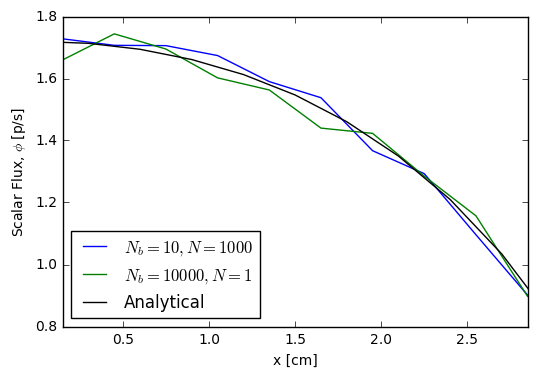

In [2]:
# compare using 10,000 batches and 1 particle history for each batch
Nc = 10
Nb = 10000
N = 1

# calculate using monte carlo function
X2,phi_avg2,leak_avg2,phi_dev2,leak_dev2 = inf_slab_reflector(Sig_t,Sig_s,Sig_a,Q,xB,Nc,Nb,N)
# print results
print('Cell\t Scalar Flux\t Deviation')
for i in range(10):
    print(i+1,'\t',phi_avg2[i],'\t\t',phi_dev2[i])
print('')
print('Leakage at the Right Boundary')
print('J =',leak_avg2, 'particles/second')
print('Deviation =',leak_dev2)

#plot scalar flux
plt.plot(X,phi_avg,label='$N_b=10, N=1000$')
plt.plot(X2,phi_avg2,label='$N_b=10000, N=1$')
plt.plot(xs,phi_anal(xs),color='black',label='Analytical')
plt.xlabel('x [cm]')
plt.ylabel('Scalar Flux, $\phi$ [p/s]')
plt.xlim(X[0],X[-1])
plt.legend(loc=3)
plt.show()